# Bessel Beam using Axicon

In [1]:
import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [2]:
x = np.linspace(-2,2,2000)
xv,yv = np.meshgrid(x,x)    #defining 2d meshgrid xy plane 


## Plotting the aperture 

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


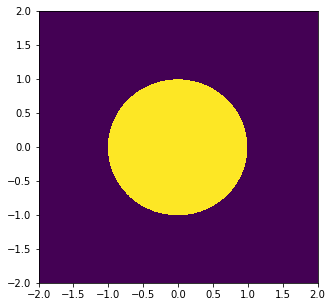

In [3]:
circ = np.sqrt(xv**2 + yv**2)<1
U1 = circ.astype(float)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U1)

In [4]:
# Defining wavelength of light and parameters for axicon
lam = 660*10**(-6)
k = 2*np.pi/lam     #magnitude of propagation vector
f = 120                  
n = 1.5   #refractive index of axicon material      
alpha = 0.5  #axicon angle in radians

## Putting the axicon on aperture

In [5]:
# Phase transformation of plane wave by axicon
r = np.sqrt(xv**2 + yv**2)
U02 = np.exp(1j*k*r*np.tan(np.deg2rad(alpha))*0.5)
U0 = 50*U02*U1

### Calculating diffraction pattern by axicon using angular spectrum analysis


In [6]:
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


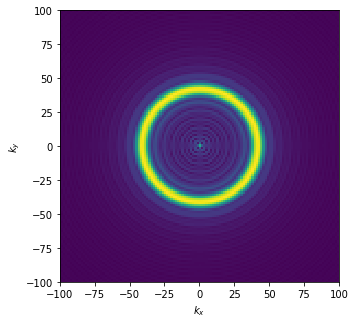

In [7]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv),fftshift(kyv),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [8]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))
#this function gives diffraction pattern at distance z from the aperture

### Diffraction patterns produced by our system of aperture+axicon at different distances z(cm) from the aperture 

#### note: I am considering the diffraction pattern within the central region of the size of aperture since bessel beam starts appearing in the central part at about z = 60cm. (depth of focus = 68.7cm)

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


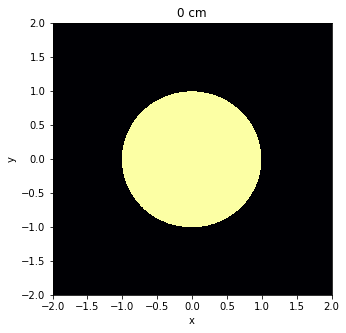

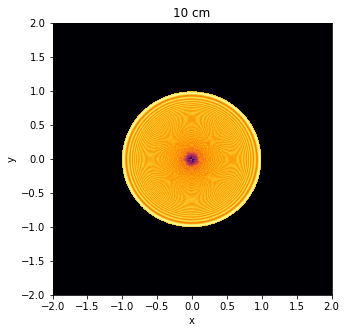

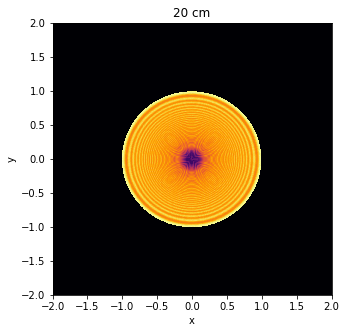

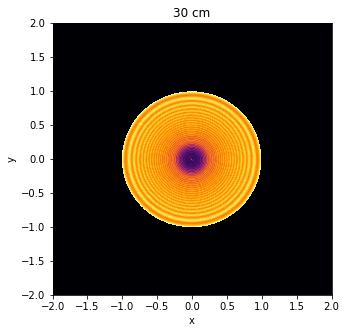

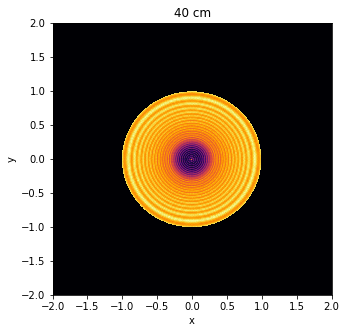

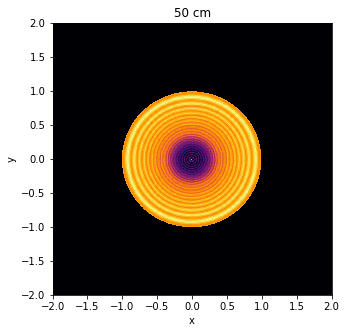

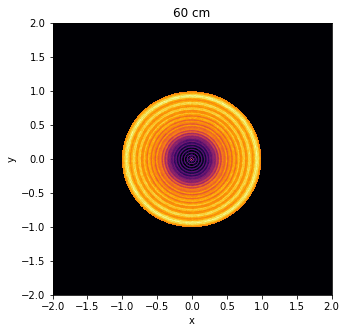

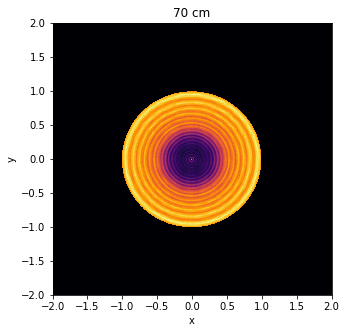

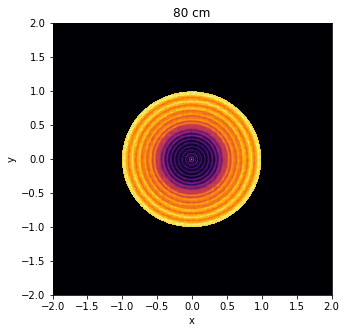

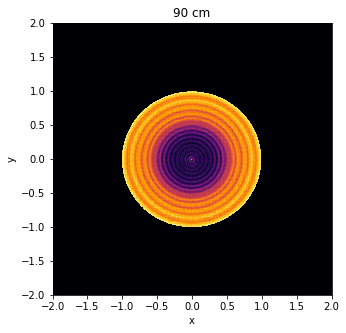

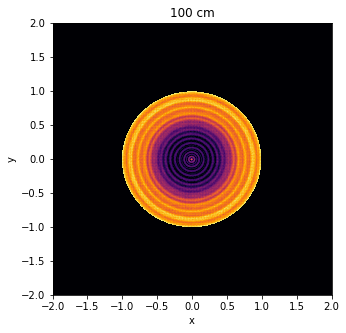

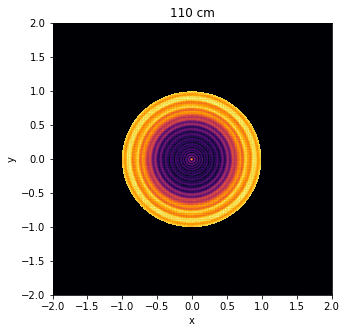

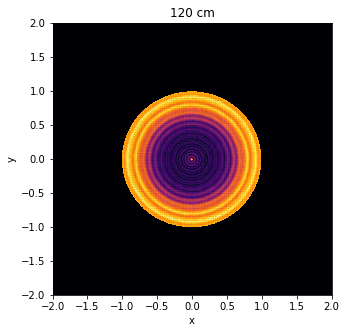

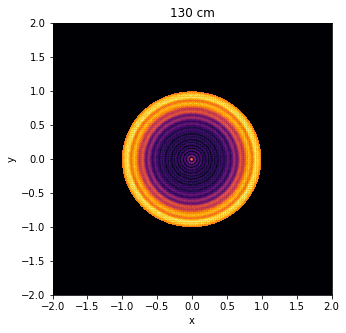

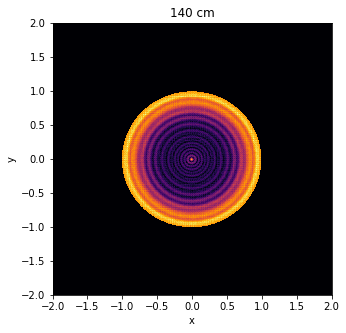

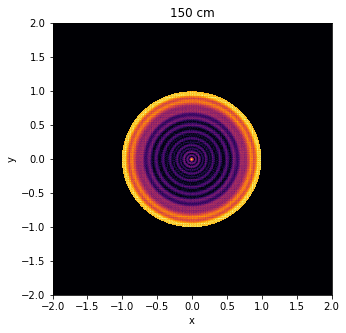

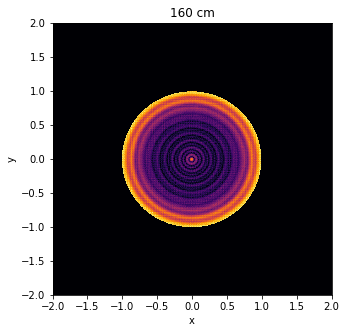

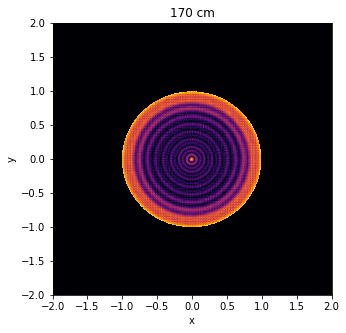

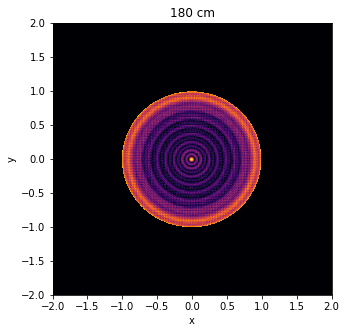

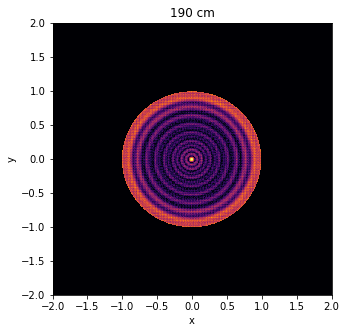

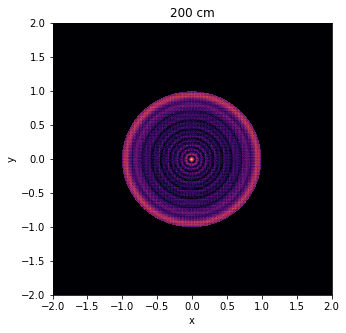

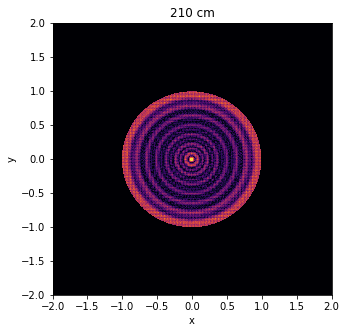

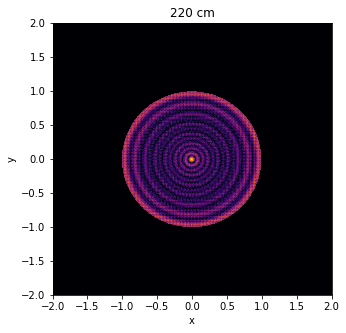

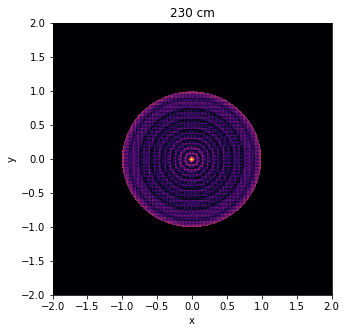

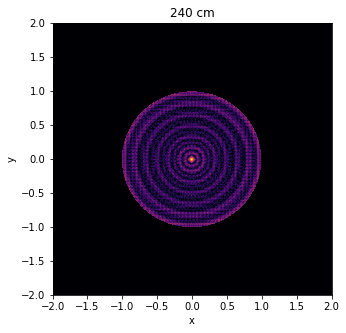

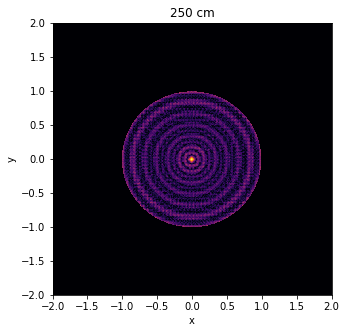

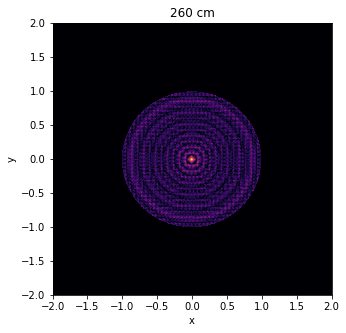

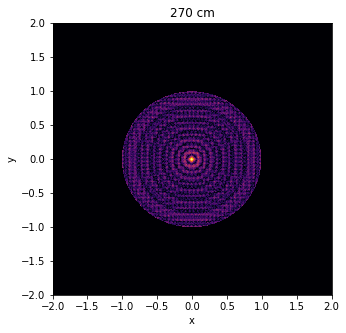

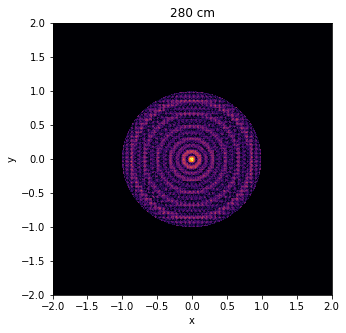

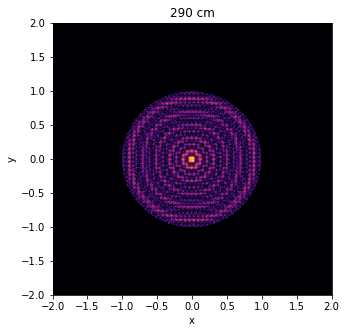

In [9]:

z = np.arange(0,300,10)
for i in z:
    z1 = i
    U = get_U(z1,k)     #get value of U
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xv,yv,np.abs(U)*U1,cmap='inferno')
    #plt.plot(xv,np.abs(U))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(str(z1)+ " cm")
    #plt.xlim(-2,2)
    #plt.ylim(-2,2)
    plt.show()